In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt

# 1. Загрузка данных

In [2]:
taxi=pd.read_csv("./yellow_tripdata_2016-05.csv")

In [3]:
taxi.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [5]:
West=-74.25559
East=-73.70001
South=40.49612
North=40.91553

In [6]:
taxi = taxi.loc[taxi['passenger_count'] != 0]
taxi = taxi.loc[taxi['trip_distance'] != 0]
taxi = taxi.loc[taxi['tpep_pickup_datetime'] != taxi['tpep_dropoff_datetime']]
taxi = taxi.loc[taxi['pickup_longitude'] <= East ]
taxi = taxi.loc[taxi['pickup_longitude'] >= West ]
taxi = taxi.loc[taxi['pickup_latitude'] >= South ]
taxi = taxi.loc[taxi['pickup_latitude'] <= North ]

In [7]:
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


In [17]:
from datetime import datetime as dt
from datetime import timedelta, date

In [18]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")

In [19]:
taxi['tpep_pickup_datetime'] = taxi['tpep_pickup_datetime'].dt.floor('H')

In [20]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  object        
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RatecodeID             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

In [8]:
def get_reg_num(taxi, step=50, W=West, E=East, S=South, N=North):
    step_long = (E - W)/step
    step_lat = (N - S)/step
    num_long = np.floor((taxi['pickup_longitude'] - W)/step_long) 
    num_lat = np.floor((taxi['pickup_latitude'] - S)/step_lat) 
    taxi['region'] = num_long*step + num_lat + 1
    return taxi 

In [9]:
taxi = get_reg_num(taxi)

In [10]:
taxi['region']

0           1233.0
1           1180.0
2           1180.0
3           1173.0
4           1130.0
             ...  
11836837    1384.0
11836838    2068.0
11836839    1127.0
11836840    1232.0
11836841    1361.0
Name: region, Length: 11626521, dtype: float64

In [11]:
def get_single_reg_num(v, step=50, W=West, E=East, S=South, N=North):
    step_long = (E - W)/step
    step_lat = (N - S)/step
    num_long = np.floor((v[0] - W)/step_long) 
    num_lat = np.floor((v[1] - S)/step_lat) 
    reg = num_long*step + num_lat + 1
    return reg

# 2. Агрегация

In [103]:
days = pd.Period('may').days_in_month
m_hours = days * 24
binx = np.linspace(0, m_hours, m_hours+1)
biny = np.linspace(0, 2500, 2501)

In [104]:
delta = taxi['tpep_pickup_datetime']-pd.to_datetime("2016-05-01 00:00:00", format='%Y-%m-%d %H:%M:%S')
delta = delta.apply(lambda x: x.days*24 + x.seconds/3600)

In [105]:
agr = stats.binned_statistic_2d(delta.values, taxi['region'].values, delta.values, 'count', [binx, biny]).statistic

In [106]:
agr_data = pd.DataFrame(agr)

In [107]:
agr_data

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
rows = pd.to_datetime(binx[0:m_hours], origin="2016-05-01 00:00:00", unit='h') 

In [109]:
agr_data.index = rows

In [114]:
agr_data.columns = list(map(int, biny[0:2500] + 1))

In [115]:
agr_data

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2016-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. ESB и график

In [116]:
ESB_long = -73.985664
ESB_lat  =  40.748441

In [117]:
ESB_reg = get_single_reg_num([ESB_long, ESB_lat])
ESB_reg

1231.0

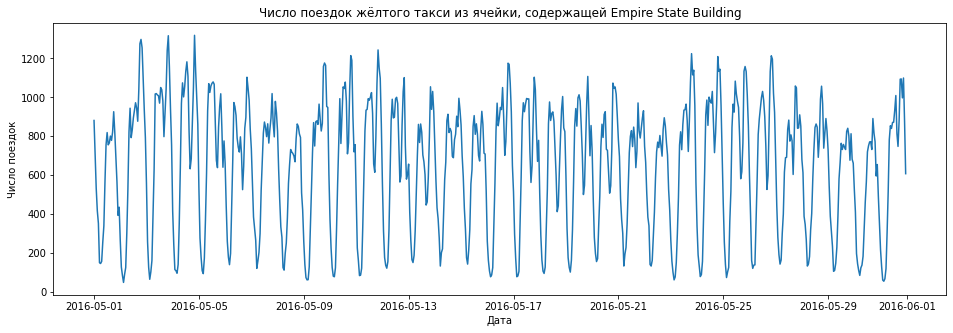

In [118]:
plt.figure(figsize=(16,5))
plt.plot(agr_data.index, agr_data.iloc[:,int(ESB_reg)], color='tab:blue')
plt.gca().set(title="Число поездок жёлтого такси из ячейки, содержащей Empire State Building", xlabel="Дата", ylabel="Число поездок")
plt.show()

# 4. Кол-во нулевых пар час-ячейка

In [127]:
print(f'Кол-во нулевых пар {agr_data.values[agr_data.values == 0].shape[0]}')

Кол-во нулевых пар 1718238
